In [10]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
plt.rcParams['font.family'] = 'MS Gothic'

In [7]:
data_farme = pd.read_excel('data.xlsx')
#概要を表示(数値データのみ)
summury = data_farme.describe()
print(summury)

             年齢          身長         体重        最大血圧       最小血圧
count  50.00000   50.000000  50.000000   50.000000   50.00000
mean   41.30000  162.540000  60.300000  124.900000   89.40000
std    12.07164   10.194456   9.418284    9.159026   15.20741
min    23.00000  141.000000  43.000000  105.000000   65.00000
25%    32.00000  154.250000  53.250000  118.250000   80.00000
50%    42.00000  165.000000  62.500000  123.000000   85.00000
75%    49.75000  168.750000  68.000000  130.750000   95.75000
max    67.00000  185.000000  75.000000  144.000000  129.00000


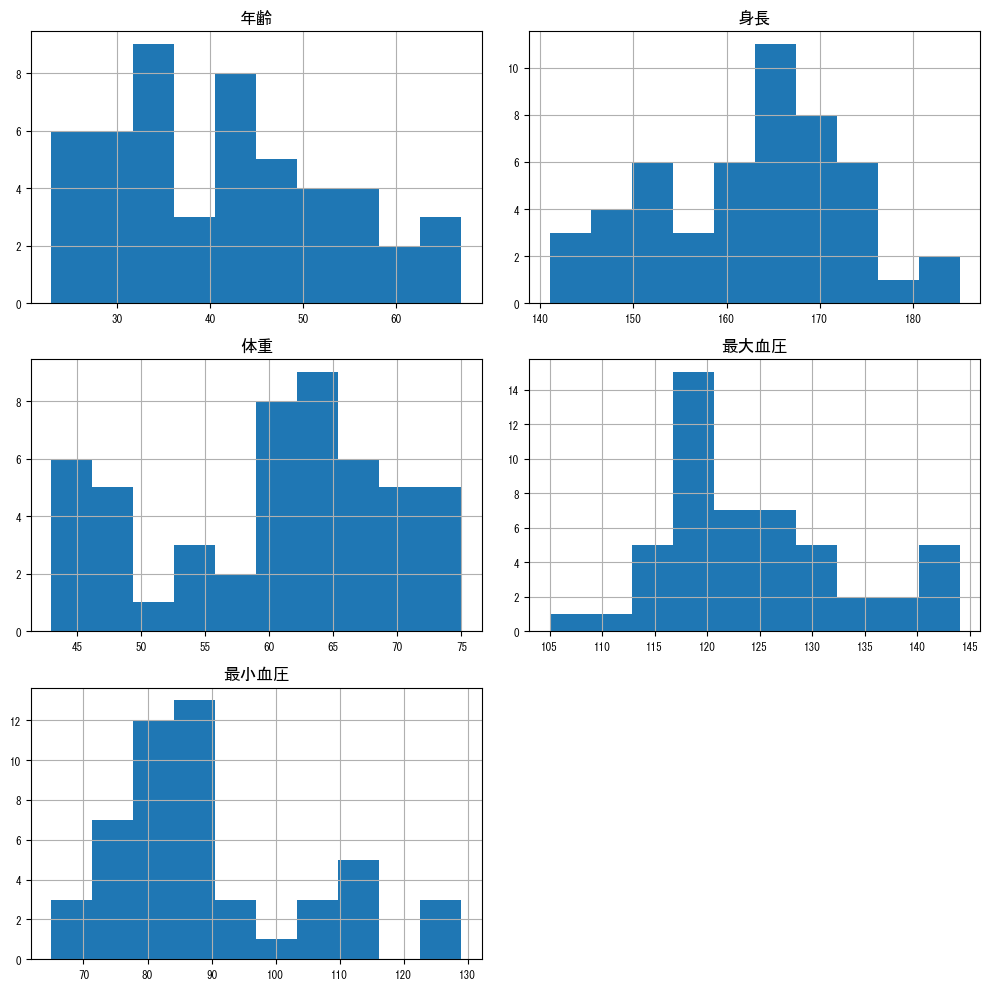

In [13]:
#各数値データの度数分布表を表示
def frequency_table(data, stur=False):

    data_len = len(data)
    print('データ数：', data_len)

    # スタージェンスの公式でbinの数を求める
    if stur is True:
        b = round(1 + np.log2(data_len))
        hist, bins = np.histogram(data, bins=b)

    else:
        hist, bins = np.histogram(data)

    # データフレーム作成
    df = pd.DataFrame(
        {
            '以上': bins[:-1],
            '以下': bins[1:],
            '階級値': (bins[:-1]+bins[1:])/2,
            '度数': hist
        }
    )

    # 相対度数の計算
    df['相対度数'] = df['度数'] / data_len

    # 累積度数の計算
    df['累積度数'] = np.cumsum(df['度数'])

    # 累積相対度数の計算
    df['累積相対度数'] = np.cumsum(df['相対度数'])

    return df
#各数値データのヒストグラムを表示
data_farme.hist(xlabelsize=8, ylabelsize=8, figsize=(10,10))
plt.tight_layout()

In [ ]:
#各数値データの相関比を計算
